# HW4 : A visit to the movie zoo!

![](https://vignette.wikia.nocookie.net/bojackhorseman/images/f/f2/HSACWDTK%3FDTKT%3FLFO%21%21.png/revision/latest?cb=20150720050503)

## Task
In this homework, your task is to visualize THREE non-typical charts on anything related to your favorite **movie star!**
This means you CANNOT use the Big 4 chart types or their close variants (i.e. Pie, Bar, Line and Scatter, Area, etc.)

You are free to use any other chart type whether or not they were covered in class!
The lecture on Visit To The Zoo is a good place to start to get ideas on what kinds of charts exist.

For the data, you are free to use any data source you deem fit.
For charting, we will NOT be constraining the technology you use. 
You are free to produce the charts in any way you would like.

You will be judged on
* Creativity
* Presentation Quality
* Data Quality (Did your visualization reveal something interesting?)

For extra credit, you can make a fully interactive visualization.

## Ideas for Data Collection

Here, we show an example of how to collect data about Arnold Schwarzenegger!
Do note that this is just an example of the kind of data you can collect.
You are **NOT** constrained
* To the same movie star (you can pick your own!)
* To the same *kind* of data
* To the same data sources
* or to anything else!

This assignment gives you the power to do what you like!

In [8]:
# from imdbpie import ImdbFacade
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
import urllib.request
import re

#### Get data for Arnold Schwarzenegger

In [2]:
# Get an instance of IMDb class
imdb = ImdbFacade()

# Search for Arnold Schwarzenegger
people = imdb.search_for_name('Arnold Schwarzenegger')
print(people)

NameError: name 'ImdbFacade' is not defined

In [111]:
# Fetch information about him
arnold = imdb.get_name(people[0].imdb_id)

# What information do I have about him?
print('\n'.join([x for x in dir(arnold) if not x.startswith('__')]))

bios
birth_place
date_of_birth
filmography
gender
image
imdb_id
name


In [112]:
# How many movies does he have?
print(len(arnold.filmography))

710


In [113]:
# Let's fetch some more information about a movie
movie = imdb.get_title(arnold.filmography[-1])

In [114]:
# What information can I get about this movie?
print('\n'.join([x for x in dir(movie) if not x.startswith('__')]))

certification
creators
credits
directors
episode
episodes
genres
image
imdb_id
plot_outline
rating
rating_count
release_date
releases
runtime
season
stars
title
type
writers
year


In [115]:
print(movie.imdb_id)

tt0096708


In [116]:
html = """
    <div style="background-color:#FFDDDD">
    <h2> Warning! </h2>
    <p> This code below is meant to be an example of what you can do. <br>
        It is not guaranteed to work always, and will need to be tweaked!
    </p>
    </div>
"""
display(HTML(html))

#### Box office numbers

In [117]:
# Let's experiment with Terminator
imdb_id = 'tt0088247'

# Fetch the box office numbers
base = 'https://www.boxofficemojo.com'
url = base + '/title/' + imdb_id
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')

table = soup('th', text=re.compile(r'Release Group'))[0].parent.parent
group = table.findAll('tr', recursive=False)[1].find('a').get('href')
url = base + group

# Get total earnings domestic and international
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')
earnings = soup('h2', text=re.compile(r'Rollout'))[0].parent.parent.findAll('div')
domestic = earnings[1].find('span', {'class': 'money'}).get_text()
domestic_url = earnings[1].find('a').get('href')
international = earnings[2].find('span', {'class': 'money'}).get_text()

# Get weekly domestic earnings
url = base + domestic_url
url = url[:url.rfind('/')] + '/weekly/'
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')
table = soup.find('div', {'class':'a-section imdb-scroll-table-inner'}).findAll('tr')
weekly = []
for tr in table[1:]:
    date = tr.findAll('td')[0].get_text()
    earning = tr.findAll('td')[2].get_text()
    weekly.append((date, earning))

# Print the values we've just got!
print("Total Domestic Earnings: %s" % domestic)
print("Total International Earnings: %s" % international)
print("Weekly Domestic Earnings:")
for date, earning in weekly:
    print("\t%s \t: %s" % (date, earning))

Total Domestic Earnings: $38,371,200
Total International Earnings: $40,000,000
Weekly Domestic Earnings:
	Oct 26-Nov 1 	: $5,560,930
	Nov 2-8 	: $5,752,018
	Nov 9-15 	: $4,764,277
	Nov 16-22 	: $5,208,881
	Nov 23-29 	: $4,851,910
	Nov 30-Dec 6 	: $3,741,759
	Dec 7-13 	: $2,002,925
	Dec 14-20 	: $1,399,646
	Dec 21-27 	: $722,260
	Jan 11-17 	: $752,723
	Jan 18-24 	: $618,670


## Other resources!

This assignment doesn't have a restriction on where you can look for data.
Further, we don't mind how you collect the data, or what data you collect.

Here are some additional resources for this example, and you can customize it for your own!
* Arnold Schwarzenegger Kill Count: https://www.youtube.com/watch?v=OE6jpTaOYMU
* Arnold Schwarzenegger Top Quotes: https://www.youtube.com/watch?v=pDxn0Xfqkgw

You could think about the IMDB network as a graph, with different actors connected through movies.

Some other useful libraries/ databases:
* IMDBPy
* http://www.omdbapi.com/

In [141]:
from wordcloud import WordCloud
import re
from collections import defaultdict
import pandas as pd
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [139]:
fp = 'bond.csv'
bond_movies = pd.read_csv(fp)
bond_movies['Budget'] = pd.to_numeric(bond_movies['Budget'].str.replace('$','').str.replace(',',''))
bond_movies['Worldwide Box Office'] = pd.to_numeric(bond_movies['Worldwide Box Office'].str.replace('$','').str.replace(',',''))
bond_movies['Release'] = pd.to_datetime(bond_movies.Release)
bond_movies['prop'] = bond_movies['Worldwide Box Office'] / bond_movies['Budget']

In [155]:
bond_movies.head()

,Release,Title,Budget,Opening Weekend,Domestic Box Office,Worldwide Box Office,prop
0,2015-11-06,Spectre,300000000,"$70,403,148","$200,074,175",879620923,2.932070
1,2012-11-08,Skyfall,200000000,"$88,364,714","$304,360,277",1110526981,5.552635
2,2008-11-14,Quantum of Solace,230000000,"$67,528,882","$169,368,427",591692078,2.572574
3,2006-11-17,Casino Royale,102000000,"$40,833,156","$167,365,000",594420283,5.827650
4,2002-11-22,Die Another Day,142000000,"$47,072,040","$160,942,139",431942139,3.041846


In [140]:
hover_text = bond_movies.Title
bubble_size = bond_movies['Worldwide Box Office'] / bond_movies['Budget']  

In [148]:
fig = go.Figure(data=[go.Scatter(
    x=bond_movies['Release'] ,
    y=bond_movies['prop'],
    mode='markers',
    text = hover_text,
    marker=dict(
        size=bubble_size,
        )
)])

fig.update_layout(
    title='Revenue / Budget for each Bond film',
    xaxis=dict(
        title='Year of release',

    ),
    yaxis=dict(
        title='Revenue / Budget',

    ),
)

fig.show()

In [18]:
url = 'https://quotecatalog.com/communicator/daniel-craig/'
source = urllib.request.urlopen(url).read()
soup = BeautifulSoup(source,'lxml')

In [35]:
quotes = []
quote_text = soup.find_all('div', attrs = {'class':"quote-card__body"})
for q in quote_text:
    qt = (q.text.split('\xa0')[0].replace('—', ''))
    qt = (re.sub('\[.*\]','', qt))
    qt = qt.split('\n\n')
    if len(qt) == 1:
        quotes.append(qt[0])
    else:
        for b in qt:
            if re.match('Bond:', b) != None or re.match('James Bond:', b) != None:
                quotes.append(b.replace(':', '').strip(' '))

In [47]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [81]:
words = []
for q in quotes:
    for w in (q.split(' ')):
        if w != '' and w not in stop_words:
            words.append(w)

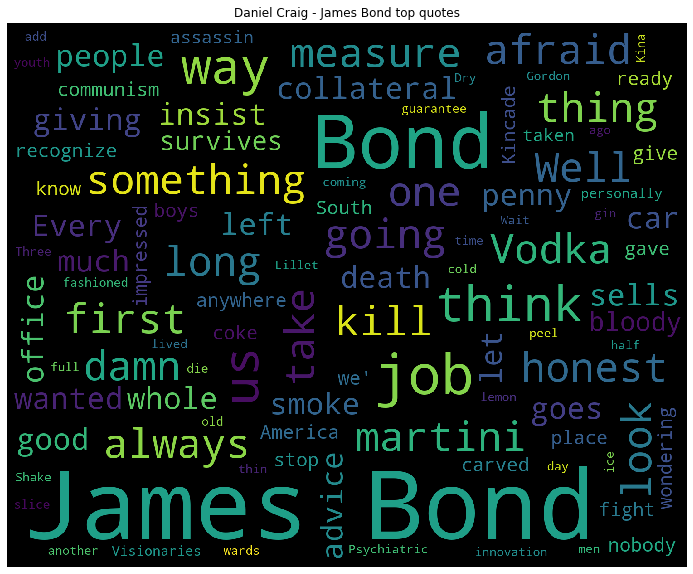

In [153]:
wc = WordCloud(max_words=100, margin=10, background_color='black',
scale=3, relative_scaling = 0.5, width=500, height=400,).generate(' '.join(words))
plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.title('Daniel Craig - James Bond top quotes')
plt.axis("off")
plt.show()

In [191]:
fp2 = 'bond_movie_analysis.csv'
bond_analysis = pd.read_csv(fp2)
bond_analysis.head()

,Film,Actor,Kills,Relationships,Alcohol_Units,Alcohol,Nationality,Rating
0,Dr. No,Sean Connery,4,3,11.5,Medium,Scottish,7.3
1,From Russia With Love,Sean Connery,11,2,16.0,High,Scottish,7.4
2,Goldfinger,Sean Connery,9,4,12.0,Medium,Scottish,7.7
3,Thunderball,Sean Connery,20,5,14.5,Medium,Scottish,7.0
4,You Only Live Twice,Sean Connery,21,4,9.5,Medium,Scottish,6.9


In [192]:
import seaborn as sns

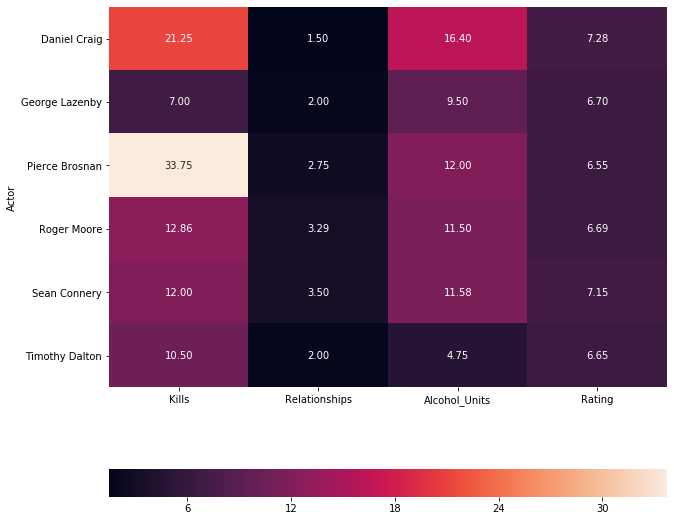

In [194]:
plt.figure(figsize=(10,10))
sns.heatmap(bond_analysis.groupby('Actor').mean(),annot=True, fmt=".02f", cbar_kws={"orientation": "horizontal"})